# GridWorld environment

In [ ]:
!pip install gym
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 4.7 MB/s eta 0:00:00


In [ ]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class GridWorldEnv(gym.Env):
    def __init__(self):
        super(GridWorldEnv, self).__init__()
        self.grid_size = 5
        self.obstacles = [(1, 1), (2, 2), (3, 3)]
        self.goal_position = (4, 4)
        self.action_space = spaces.Discrete(4)  # up, down, left, right
        self.observation_space = spaces.Box(low=0, high=self.grid_size-1, shape=(2,), dtype=np.int32)
        self.reset()

    def reset(self):
        self.agent_position = np.random.randint(0, self.grid_size, size=(2,))
        while tuple(self.agent_position) in self.obstacles or tuple(self.agent_position) == self.goal_position:
            self.agent_position = np.random.randint(0, self.grid_size, size=(2,))
        return self.agent_position

    def step(self, action):
        x, y = self.agent_position
        if action == 0:  # up
            x -= 1
        elif action == 1:  # down
            x += 1
        elif action == 2:  # left
            y -= 1
        elif action == 3:  # right
            y += 1
        x = np.clip(x, 0, self.grid_size - 1)
        y = np.clip(y, 0, self.grid_size - 1)
        self.agent_position = np.array([x, y])
        reward = -0.1
        done = False
        if tuple(self.agent_position) == self.goal_position:
            reward = 10
            done = True
        elif tuple(self.agent_position) in self.obstacles:
            reward = -1
        return self.agent_position, reward, done, {}

    def render(self, mode='human'):
        fig, ax = plt.subplots()
        ax.set_xlim(0, self.grid_size)
        ax.set_ylim(0, self.grid_size)
        ax.set_xticks(np.arange(0, self.grid_size, 1))
        ax.set_yticks(np.arange(0, self.grid_size, 1))
        ax.grid(which='both')

        for obs in self.obstacles:
            rect = patches.Rectangle(obs, 1, 1, linewidth=1, edgecolor='r', facecolor='r')
            ax.add_patch(rect)

        goal = patches.Rectangle(self.goal_position, 1, 1, linewidth=1, edgecolor='g', facecolor='g')
        ax.add_patch(goal)

        agent = patches.Circle(self.agent_position + 0.5, 0.3, linewidth=1, edgecolor='b', facecolor='b')
        ax.add_patch(agent)

        plt.gca().invert_yaxis()
        plt.show()

# Register the environment with Gym
gym.envs.registration.register(
    id='GridWorld-v0',
    entry_point='__main__:GridWorldEnv',
    max_episode_steps=100,
)


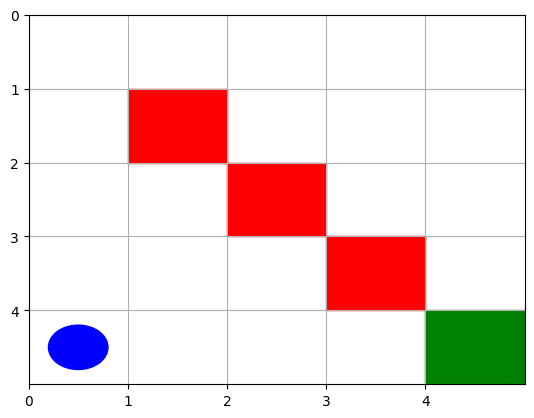

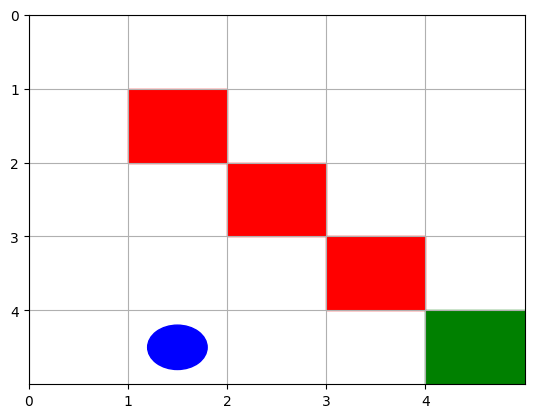

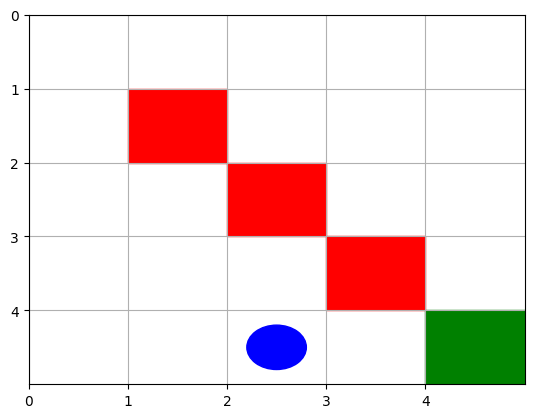

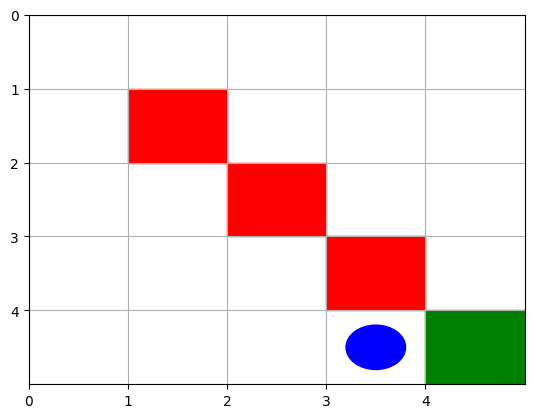

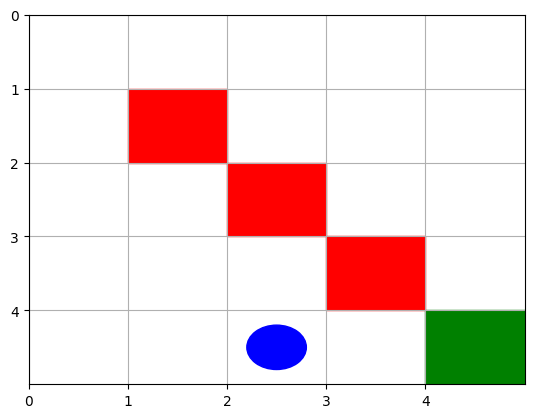

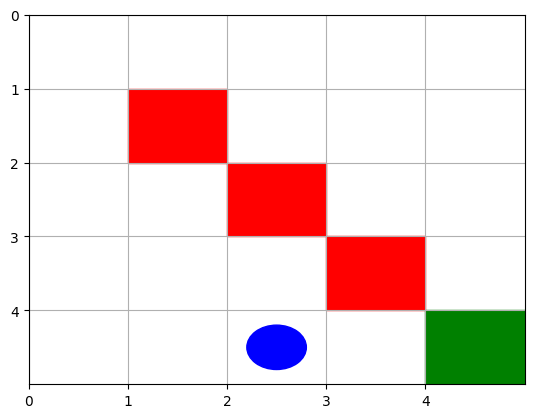

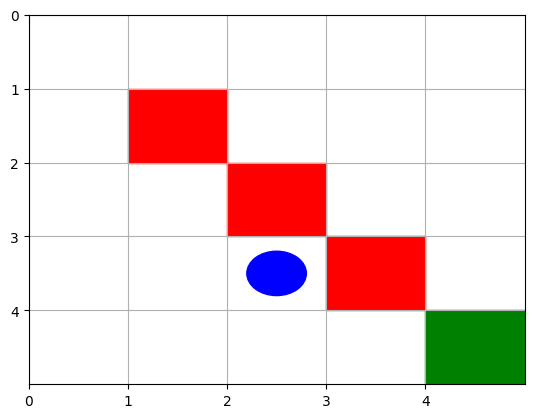

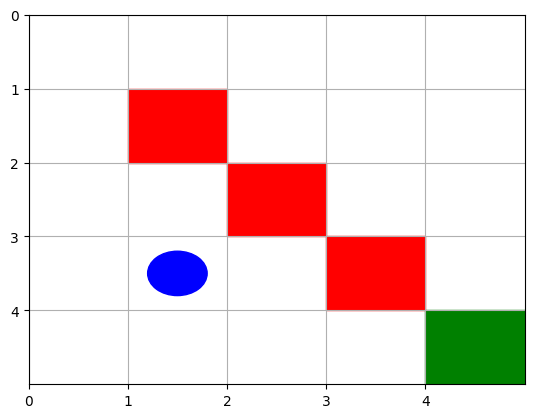

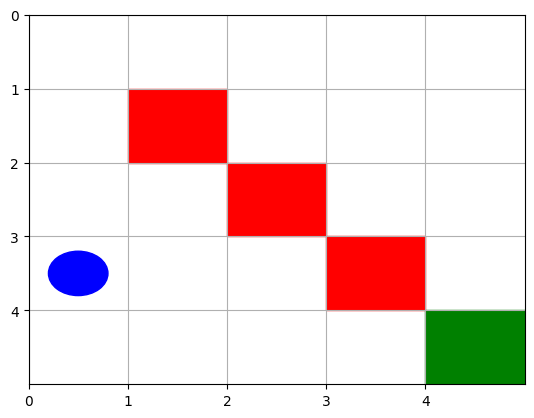

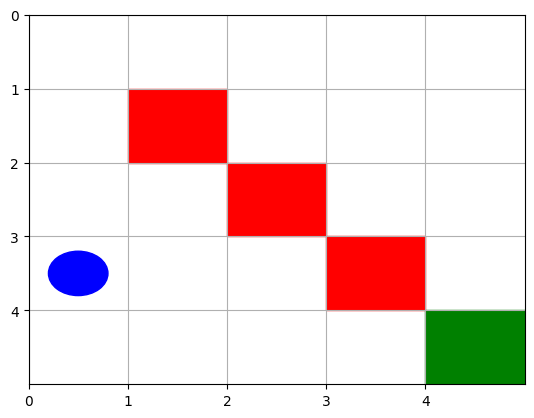

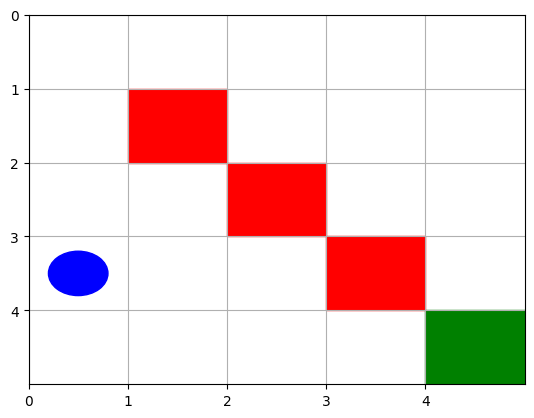

In [ ]:
if __name__ == '__main__':
    env = GridWorldEnv()
    env.reset()
    env.render()

    for _ in range(10):
        action = env.action_space.sample()
        env.step(action)
        env.render()

# Stable-Baselines

In [ ]:
!pip install stable-baselines3[extra]
!pip install 'shimmy>=0.2.1'

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 61.7     |
|    ep_rew_mean     | -5.85    |
| time/              |          |
|    fps             | 1080     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 42.6        |
|    ep_rew_mean          | -0.0115     |
| time/                   |             |
|    fps                  | 658         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.015296544 |
|    clip_fraction        | 0.188       |
|    clip_range           | 0.2         |
|    entropy_loss   

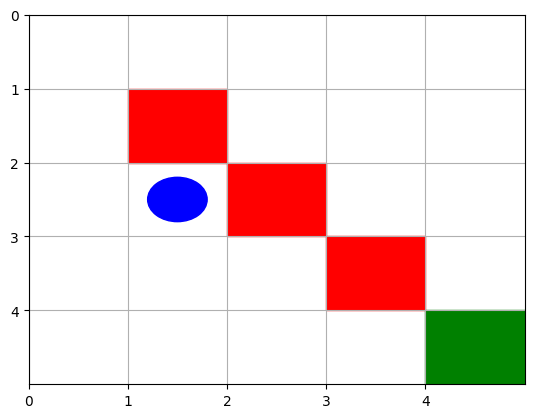

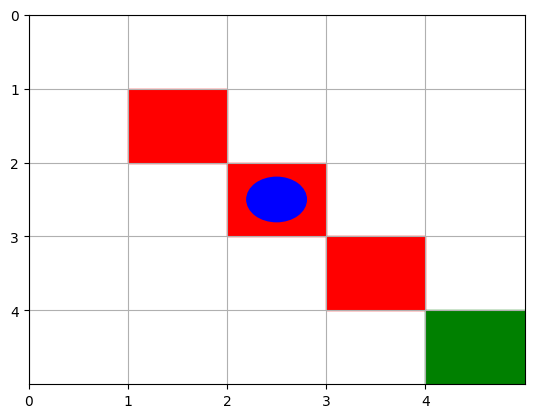

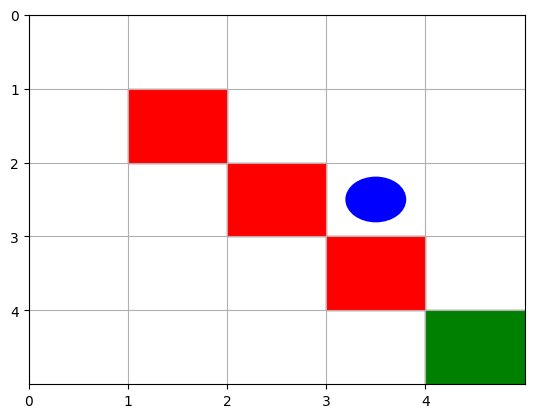

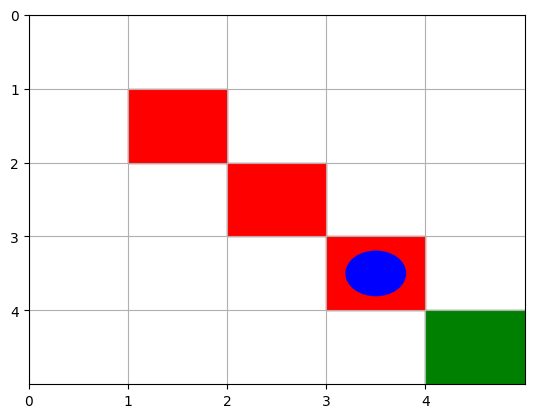

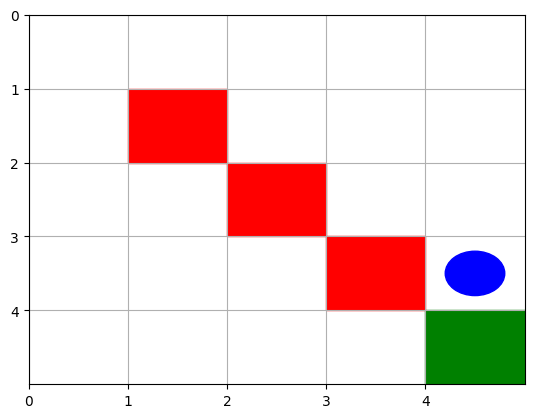

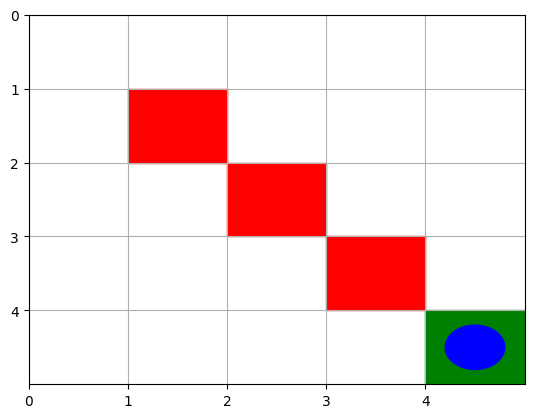

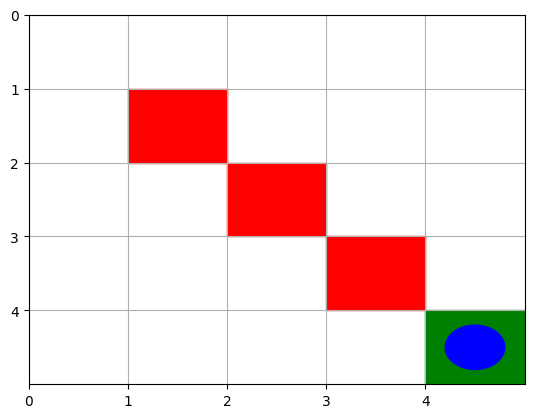

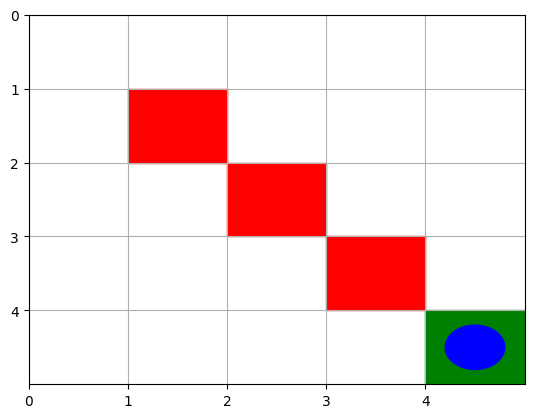

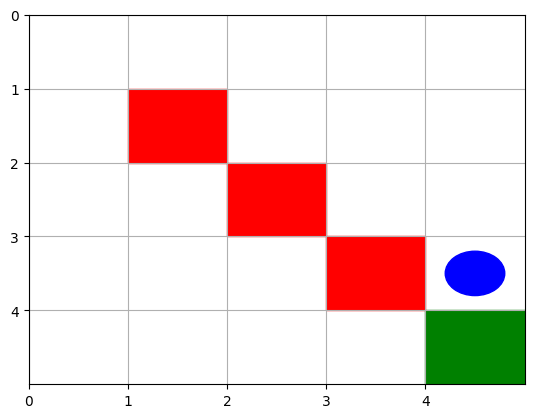

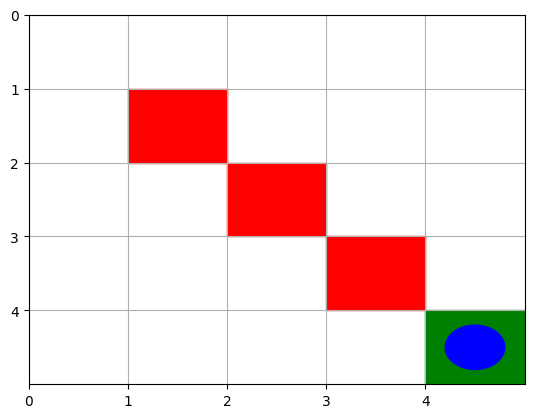

In [ ]:
from stable_baselines3 import PPO

# Create the environment
env = gym.make('GridWorld-v0')

# Create the PPO agent
model = PPO('MlpPolicy', env, verbose=1)

# Train the agent
model.learn(total_timesteps=10000)

# Test the agent
obs = env.reset()
for _ in range(10):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

# Ray RLlib

In [ ]:
!pip install ray[rllib]

In [ ]:
# Import necessary libraries from Ray
import ray
from ray import tune
from ray.rllib.algorithms.ppo import PPO

# Initialize Ray
ray.init(ignore_reinit_error=True)

# Define the configuration
config = {
    "env": "GridWorld-v0",
    "framework": "torch",  # Use PyTorch for faster training
}

# Train the agent
tune.run(PPO, config=config, stop={"timesteps_total": 10000})

# Shutdown Ray
ray.shutdown()

/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
2024-06-28 12:51:06,777	INFO worker.py:1771 -- Started a local Ray instance.


+------------------------------------------------------------+
| Configuration for experiment     PPO_2024-06-28_12-51-08   |
+------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator     |
| Scheduler                        FIFOScheduler             |
| Number of trials                 1                         |
+------------------------------------------------------------+

View detailed results here: /root/ray_results/PPO_2024-06-28_12-51-08
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-06-28_12-51-02_671260_3444/artifacts/2024-06-28_12-51-08/PPO_2024-06-28_12-51-08/driver_artifacts`

Trial status: 1 PENDING
Current time: 2024-06-28 12:51:08. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/0 GPUs
+-----------------------------------------+
| Trial name                     status   |
+-----------------------------------------+
| PPO_GridWorld-v0_16f75_00000   PENDI

2024-06-28 12:52:09,007	WARNING insufficient_resources_manager.py:163 -- Ignore this message if the cluster is autoscaling. No trial is running and no new trial has been started within the last 60 seconds. This could be due to the cluster not having enough resources available. You asked for 3.0 CPUs and 0 GPUs per trial, but the cluster only has 2.0 CPUs and 0 GPUs available. Stop the tuning and adjust the required resources (e.g. via the `ScalingConfig` or `resources_per_trial`, or `num_workers` for rllib), or add more resources to your cluster.


Trial status: 1 PENDING
Current time: 2024-06-28 12:52:09. Total running time: 1min 0s
Logical resource usage: 0/2 CPUs, 0/0 GPUs
+-----------------------------------------+
| Trial name                     status   |
+-----------------------------------------+
| PPO_GridWorld-v0_16f75_00000   PENDING  |
+-----------------------------------------+
Trial status: 1 PENDING
Current time: 2024-06-28 12:52:39. Total running time: 1min 30s
Logical resource usage: 0/2 CPUs, 0/0 GPUs
+-----------------------------------------+
| Trial name                     status   |
+-----------------------------------------+
| PPO_GridWorld-v0_16f75_00000   PENDING  |
+-----------------------------------------+


2024-06-28 12:53:09,047	WARNING insufficient_resources_manager.py:163 -- Ignore this message if the cluster is autoscaling. No trial is running and no new trial has been started within the last 60 seconds. This could be due to the cluster not having enough resources available. You asked for 3.0 CPUs and 0 GPUs per trial, but the cluster only has 2.0 CPUs and 0 GPUs available. Stop the tuning and adjust the required resources (e.g. via the `ScalingConfig` or `resources_per_trial`, or `num_workers` for rllib), or add more resources to your cluster.


Trial status: 1 PENDING
Current time: 2024-06-28 12:53:09. Total running time: 2min 0s
Logical resource usage: 0/2 CPUs, 0/0 GPUs
+-----------------------------------------+
| Trial name                     status   |
+-----------------------------------------+
| PPO_GridWorld-v0_16f75_00000   PENDING  |
+-----------------------------------------+
Trial status: 1 PENDING
Current time: 2024-06-28 12:53:39. Total running time: 2min 30s
Logical resource usage: 0/2 CPUs, 0/0 GPUs
+-----------------------------------------+
| Trial name                     status   |
+-----------------------------------------+
| PPO_GridWorld-v0_16f75_00000   PENDING  |
+-----------------------------------------+


2024-06-28 12:54:09,050	WARNING insufficient_resources_manager.py:163 -- Ignore this message if the cluster is autoscaling. No trial is running and no new trial has been started within the last 60 seconds. This could be due to the cluster not having enough resources available. You asked for 3.0 CPUs and 0 GPUs per trial, but the cluster only has 2.0 CPUs and 0 GPUs available. Stop the tuning and adjust the required resources (e.g. via the `ScalingConfig` or `resources_per_trial`, or `num_workers` for rllib), or add more resources to your cluster.


Trial status: 1 PENDING
Current time: 2024-06-28 12:54:09. Total running time: 3min 0s
Logical resource usage: 0/2 CPUs, 0/0 GPUs
+-----------------------------------------+
| Trial name                     status   |
+-----------------------------------------+
| PPO_GridWorld-v0_16f75_00000   PENDING  |
+-----------------------------------------+
Trial status: 1 PENDING
Current time: 2024-06-28 12:54:39. Total running time: 3min 30s
Logical resource usage: 0/2 CPUs, 0/0 GPUs
+-----------------------------------------+
| Trial name                     status   |
+-----------------------------------------+
| PPO_GridWorld-v0_16f75_00000   PENDING  |
+-----------------------------------------+


2024-06-28 12:55:05,810	WARNING tune.py:219 -- Stop signal received (e.g. via SIGINT/Ctrl+C), ending Ray Tune run. This will try to checkpoint the experiment state one last time. Press CTRL+C (or send SIGINT/SIGKILL/SIGTERM) to skip. 
2024-06-28 12:55:05,817	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/PPO_2024-06-28_12-51-08' in 0.0047s.
2024-06-28 12:55:05,828	WARNING tune.py:1056 -- Experiment has been interrupted, but the most recent state was saved.
Resume experiment with: tune.run(..., resume=True)
2024-06-28 12:55:05,836	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 1 trial(s):
- PPO_GridWorld-v0_16f75_00000: FileNotFoundError('Could not fetch metrics for PPO_GridWorld-v0_16f75_00000: both result.json and progress.csv were not found at /root/ray_results/PPO_2024-06-28_12-51-08/PPO_GridWorld-v0_16f75_00000_0_2024-06-28_12-51-08')


Trial status: 1 PENDING
Current time: 2024-06-28 12:55:05. Total running time: 3min 57s
Logical resource usage: 0/2 CPUs, 0/0 GPUs
+-----------------------------------------+
| Trial name                     status   |
+-----------------------------------------+
| PPO_GridWorld-v0_16f75_00000   PENDING  |
+-----------------------------------------+

